In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
dataframes_OD = {}
df_concat_OD = pd.DataFrame()
for yr in years:
    dataframes_OD[yr] = pd.read_csv("../data/BixiMontrealRentals{}/OD_{}.csv".format(yr, yr), low_memory=False)
    if len(dataframes_OD)==1:
        df_concat_OD = dataframes_OD[yr]
    else:
        df_concat_OD = pd.concat([df_concat_OD, dataframes_OD[yr]], sort=False)
        
    

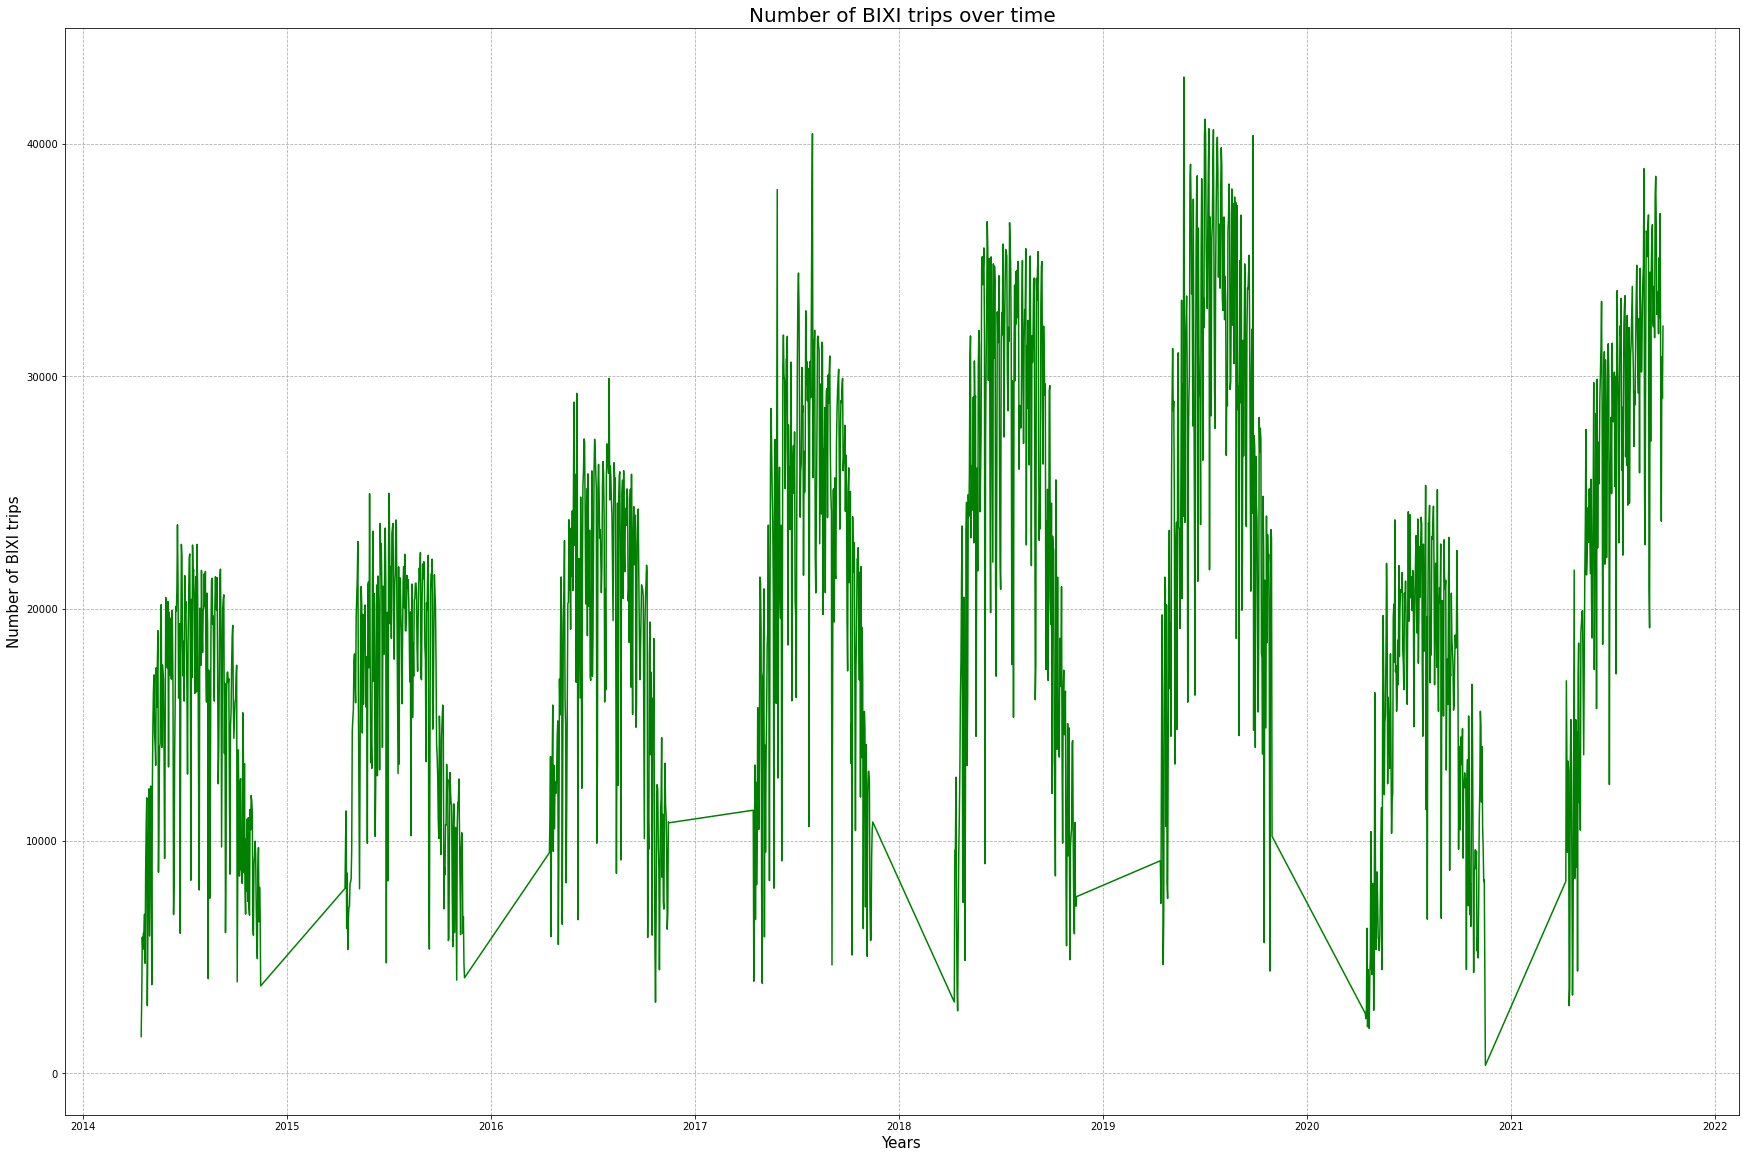

In [3]:
#convert start_date and end_date to datetime objects
df_concat_OD[['start_date','end_date']] =  df_concat_OD[['start_date','end_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M')

def plot_yearly_trips(data):    
    df = data.copy()
    yearly_df = df.groupby(df['start_date'].dt.date).size().reset_index(name='count')
    #Initialize a figure and plot on the canvas
    fig, ax = plt.subplots(figsize=(30,20))
    ax.set_title("Number of BIXI trips over time", fontsize= 20)
    ax.set_ylabel("Number of BIXI trips", fontsize= 15)
    ax.set_xlabel("Years", fontsize= 15)
    plt.plot(yearly_df['start_date'], yearly_df["count"], color= 'g')
    plt.grid(linestyle="--")
    plt.show()
plot_yearly_trips(df_concat_OD)    